In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import GridSearchCV


 
%matplotlib inline

In [2]:
data= pd.read_csv('winequalityN.csv')


In [3]:
data.head(4).T

,0,1,2,3
color,white,white,white,white
fixed acidity,7,6.3,8.1,7.2
volatile acidity,0.27,0.3,0.28,0.23
citric acid,0.36,0.34,0.4,0.32
residual sugar,20.7,1.6,6.9,8.5
chlorides,0.045,0.049,0.05,0.058
free sulfur dioxide,45,14,30,47
total sulfur dioxide,170,132,97,186
density,1.001,0.994,0.9951,0.9956
pH,3,3.3,3.26,3.19


In [4]:
data.shape

(6497, 13)

In [5]:
data.dtypes

color                    object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [7]:
data.isnull().sum()

color                    0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
data.quality.value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

In [9]:
data.drop_duplicates()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,white,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
data.fillna(data.mean(numeric_only=True).round(1), inplace=True)
data.isnull().sum()

color                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

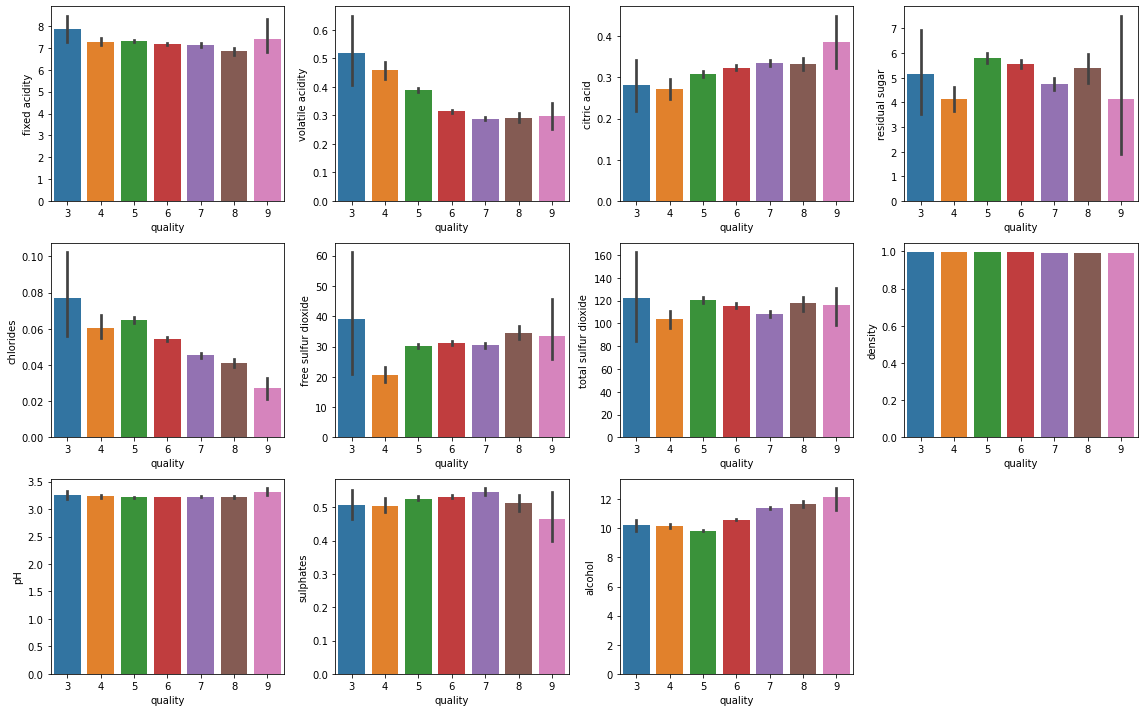

In [11]:
fig = plt.figure(figsize=(16,10))
plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=data)
plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=data)
plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=data)
plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=data)
plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=data)
plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=data)
plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=data)
plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=data)
plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=data)
plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=data)
plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=data)
plt.tight_layout()

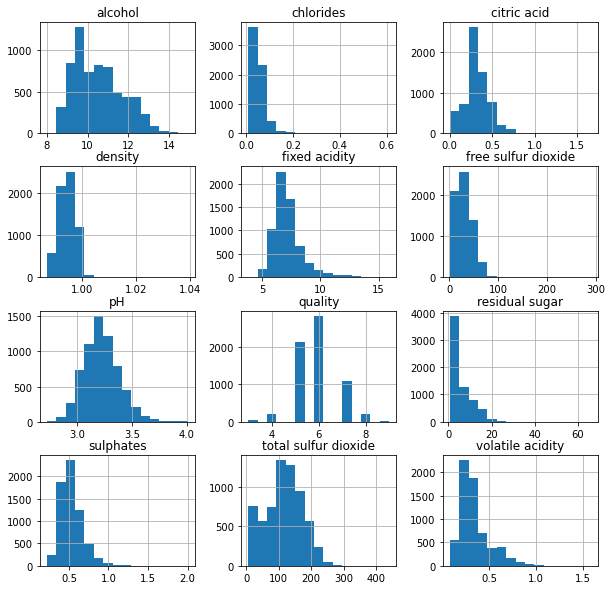

In [12]:
data.hist(bins=15, figsize=(10, 10))
plt.show()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


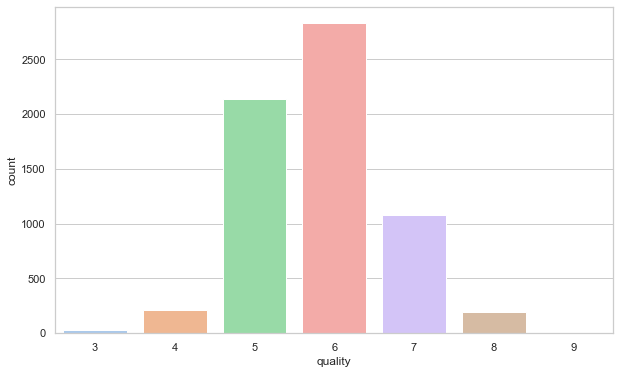

In [13]:
sns.set(style="whitegrid")
print(data['quality'].value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot('quality', data=data, palette='pastel')

In [14]:

data.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


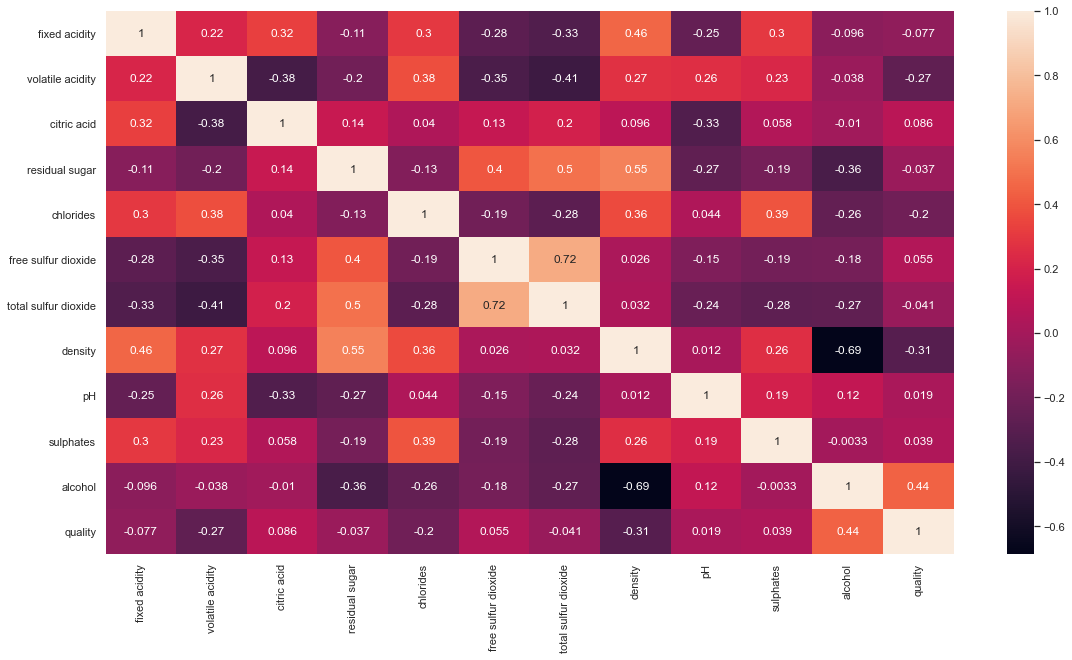

In [15]:
plt.figure(figsize=[19,10],facecolor='white')
sns.heatmap(data.corr(),annot=True)

In [16]:
#for a in range(len(data.corr().columns)):
 #      if abs(data.corr().iloc[a,b]) >0.7:
  #          name = data.corr().columns[a]
   #         print(name)

In [17]:
#data=data.drop('total sulfur dioxide',axis=1)

In [18]:
#data['best quality'] = [1 if x > 5 else 0 for x in data.quality]
bins = (2, 6.5, 9)
group_names = ['bad', 'good']
data['best quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
data['best quality'] = label_quality.fit_transform(data['best quality'])


data.replace({'white': 1, 'red': 0}, inplace=True)


In [19]:
from sklearn.model_selection import train_test_split
X = data.drop(['quality','best quality'],axis=1) 
y = data['best quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [21]:
# importing modules
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(penalty=None)

# fit data
sgd_model=sgd.fit(X_train, y_train)

# predicting values
pred_sgd = sgd_model.predict(X_test)
print(classification_report(y_test, pred_sgd))


#print("Train set Accuracy: ", accuracy_score(y_train, sgd.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, sgd.predict(X_test)))
print(confusion_matrix(y_test, pred_sgd))


#print("Train set Accuracy (F1): ", f1_score(y_train, sgd.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, sgd.predict(X_test), average='weighted'))

              precision    recall  f1-score   support

           0       0.82      0.98      0.90      1571
           1       0.66      0.13      0.22       379

    accuracy                           0.82      1950
   macro avg       0.74      0.56      0.56      1950
weighted avg       0.79      0.82      0.76      1950

Test set Accuracy:  0.8179487179487179
[[1546   25]
 [ 330   49]]
Test set Accuracy (F1):  0.7647163364521967


In [22]:
# importing modules
from sklearn.svm import SVC 

svc=SVC()

# fit data
svc_model = svc.fit(X_train,y_train)

# predicting values
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))


#print("Train set Accuracy: ", accuracy_score(y_train, svc.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, svc.predict(X_test)))
print(confusion_matrix(y_test, pred_svc))


#print("Train set Accuracy (F1): ", f1_score(y_train, svc.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, svc.predict(X_test), average='weighted'))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1571
           1       0.65      0.30      0.41       379

    accuracy                           0.83      1950
   macro avg       0.75      0.63      0.66      1950
weighted avg       0.81      0.83      0.81      1950

Test set Accuracy:  0.8333333333333334
[[1510   61]
 [ 264  115]]
Test set Accuracy (F1):  0.807910152304771


In [23]:
# importing modules
from sklearn.ensemble import RandomForestClassifier

# Make an instance of the Model
rfc = RandomForestClassifier(n_estimators=100,random_state=42)

# fit data
rfc_model = rfc.fit(X_train,y_train)

# predicting values
pred_rfc=rfc.predict(X_test)

# printing classification report
print(classification_report(pred_rfc,y_test))


#print("Train set Accuracy: ", accuracy_score(y_train, rfc.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, rfc.predict(X_test)))
print(confusion_matrix(y_test, pred_rfc))

#print("Train set Accuracy (F1): ", f1_score(y_train, rfc.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, rfc.predict(X_test), average='weighted'))





#param_grid = { 
 #   'n_estimators': [200, 500],
  #  'max_features': ['auto', 'sqrt', 'log2'],
   # 'max_depth' : [4,5,6,7,8],
    #'criterion' :['gini', 'entropy']
#}
#grid_rfd= GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#grid_rfd.fit(X_train, y_train)
# predicting values
#pred_rfd=grid_rfd.predict(X_test)

# printing classification report
#print(classification_report(pred_rfd,y_test))


              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1715
           1       0.50      0.80      0.61       235

    accuracy                           0.88      1950
   macro avg       0.73      0.84      0.77      1950
weighted avg       0.91      0.88      0.89      1950

Test set Accuracy:  0.877948717948718
[[1524   47]
 [ 191  188]]
Test set Accuracy (F1):  0.8663107979970556


In [24]:
# importing modules
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

# fit data
nb_model=nb.fit(X_train, y_train)

# predicting values
pred_nb = nb.predict(X_test)
print(classification_report(y_test, pred_nb))


#print("Train set Accuracy: ", accuracy_score(y_train, nb.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, nb.predict(X_test)))
print(confusion_matrix(y_test, pred_nb))


#print("Train set Accuracy (F1): ", f1_score(y_train, nb.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, nb.predict(X_test), average='weighted'))


              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1571
           1       0.41      0.63      0.49       379

    accuracy                           0.75      1950
   macro avg       0.65      0.70      0.66      1950
weighted avg       0.80      0.75      0.77      1950

Test set Accuracy:  0.7492307692307693
[[1222  349]
 [ 140  239]]
Test set Accuracy (F1):  0.7673957739338206


In [25]:
# importing modules
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

# fit data
dt_model=dt.fit(X_train, y_train)

# predicting values
pred_dt = dt.predict(X_test)
print(classification_report(pred_dt,y_test))
    
#print("Train set Accuracy: ", accuracy_score(y_train, dt.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, dt.predict(X_test)))
print(confusion_matrix(y_test, pred_dt))


#print("Train set Accuracy (F1): ", f1_score(y_train, dt.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, dt.predict(X_test), average='weighted'))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1572
           1       0.52      0.52      0.52       378

    accuracy                           0.81      1950
   macro avg       0.70      0.70      0.70      1950
weighted avg       0.82      0.81      0.81      1950

Test set Accuracy:  0.8148717948717948
[[1391  180]
 [ 181  198]]
Test set Accuracy (F1):  0.8147789682012512


In [26]:
# importing modules
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

# fit data
log_model=log.fit(X_train, y_train)

# predicting values
pred_log = log.predict(X_test)
print(classification_report(y_test, pred_log))


#print("Train set Accuracy: ", accuracy_score(y_train, log.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, log.predict(X_test)))
print(confusion_matrix(y_test, pred_log))


#print("Train set Accuracy (F1): ", f1_score(y_train, log.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, log.predict(X_test), average='weighted'))


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1571
           1       0.57      0.26      0.35       379

    accuracy                           0.82      1950
   macro avg       0.71      0.61      0.62      1950
weighted avg       0.79      0.82      0.79      1950

Test set Accuracy:  0.8184615384615385
[[1499   72]
 [ 282   97]]
Test set Accuracy (F1):  0.7893643256383008


In [27]:
rfc_pred = rfc.predict(X_test)
a1 = accuracy_score(y_test, rfc_pred)


dt_pred = dt.predict(X_test)
a2 = accuracy_score(y_test, dt_pred)


sgd_pred = sgd.predict(X_test)
a3 = accuracy_score(y_test, sgd_pred)


nb_pred = nb.predict(X_test)
a4 = accuracy_score(y_test, nb_pred)


svc_pred = svc.predict(X_test)
a5 = accuracy_score(y_test, svc_pred)


log_pred = log.predict(X_test)
a6 = accuracy_score(y_test, log_pred)


accuracy = [a1, a2, a3, a4, a5, a6]


In [28]:
rfc_pred = rfc.predict(X_test)
f1 = f1_score(y_test, rfc_pred, average='weighted')

log_pred = log.predict(X_test)
f2 = f1_score(y_test, dt_pred, average='weighted')

dt_pred = dt.predict(X_test)
f3 = f1_score(y_test, sgd_pred, average='weighted')

sgd_pred = sgd.predict(X_test)
f4 = f1_score(y_test, nb_pred, average='weighted')

nb_pred = nb.predict(X_test)
f5 = f1_score(y_test, svc_pred, average='weighted')

svc_pred = svc.predict(X_test)
f6 = f1_score(y_test, log_pred, average='weighted')


f1s = [f1, f2, f3, f4, f5,  f6]

In [29]:
index   = ["Random Forest", "Decision Tree","Stochastic Gradient Descent","Naive Bayes","SVM", "Logistic Regression"]
colunms = ["Accuracy", "F1-score"]




d1 = [accuracy, f1s]

d1 = np.array(d1).T


df = pd.DataFrame(d1, index=index, columns=colunms)
print(df)


                             Accuracy  F1-score
Random Forest                0.877949  0.866311
Decision Tree                0.814872  0.814779
Stochastic Gradient Descent  0.817949  0.764716
Naive Bayes                  0.749231  0.767396
SVM                          0.833333  0.807910
Logistic Regression          0.818462  0.789364
